In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

/home/owais/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
data = pd.read_csv('Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [6]:
x = data.iloc[:,1:2].values.astype(float)

In [7]:
y = data.iloc[:,2:3].values.astype(float)


In [8]:
x


array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

In [9]:
y

array([[  45000.],
       [  50000.],
       [  60000.],
       [  80000.],
       [ 110000.],
       [ 150000.],
       [ 200000.],
       [ 300000.],
       [ 500000.],
       [1000000.]])

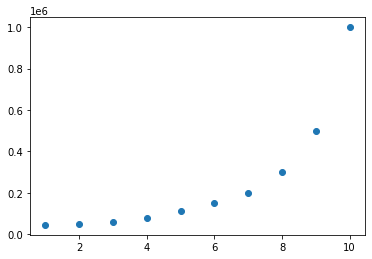

In [10]:
plt.scatter(x,y)
plt.show()

In [11]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

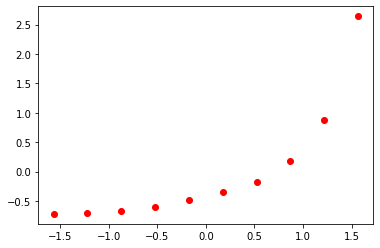

In [12]:
plt.scatter(x,y,color='Red')
plt.show()

In [14]:
model = SVR(kernel = 'rbf')

In [15]:
model.fit(x,y)

/home/owais/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

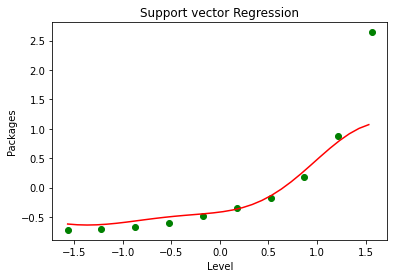

In [20]:
x_grid = np.arange(min(x),max(x),0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,color='Green')
plt.plot(x_grid,model.predict(x_grid),color='Red')
plt.title('Support vector Regression')
plt.xlabel('Level')
plt.ylabel('Packages')
plt.show()

In [21]:
#prediction
y_predict = sc_y.inverse_transform((model.predict(sc_y.fit_transform([[10]]))))

In [22]:
y_predict

array([9.58313859])

In [23]:
print(sc_y.inverse_transform((model.predict(sc_y.fit_transform([[20]])))))

[19.58313859]


In [24]:
print(model.score(x,y))

0.7516001070620798


In [25]:
#polynomial Regression

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly_x = poly.fit_transform(x)
poly.fit(poly_x,y)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [28]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(poly_x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
plt.scatter(x,y,color='Blue')
plt.plot(x,p)